In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
data = pd.read_csv(r'F:\MACHINE-LEARNING\DATA SCIENCE\New folder\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
Df = pd.DataFrame(data.drop("Pregnancies",axis=1))
Df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [11]:
Df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


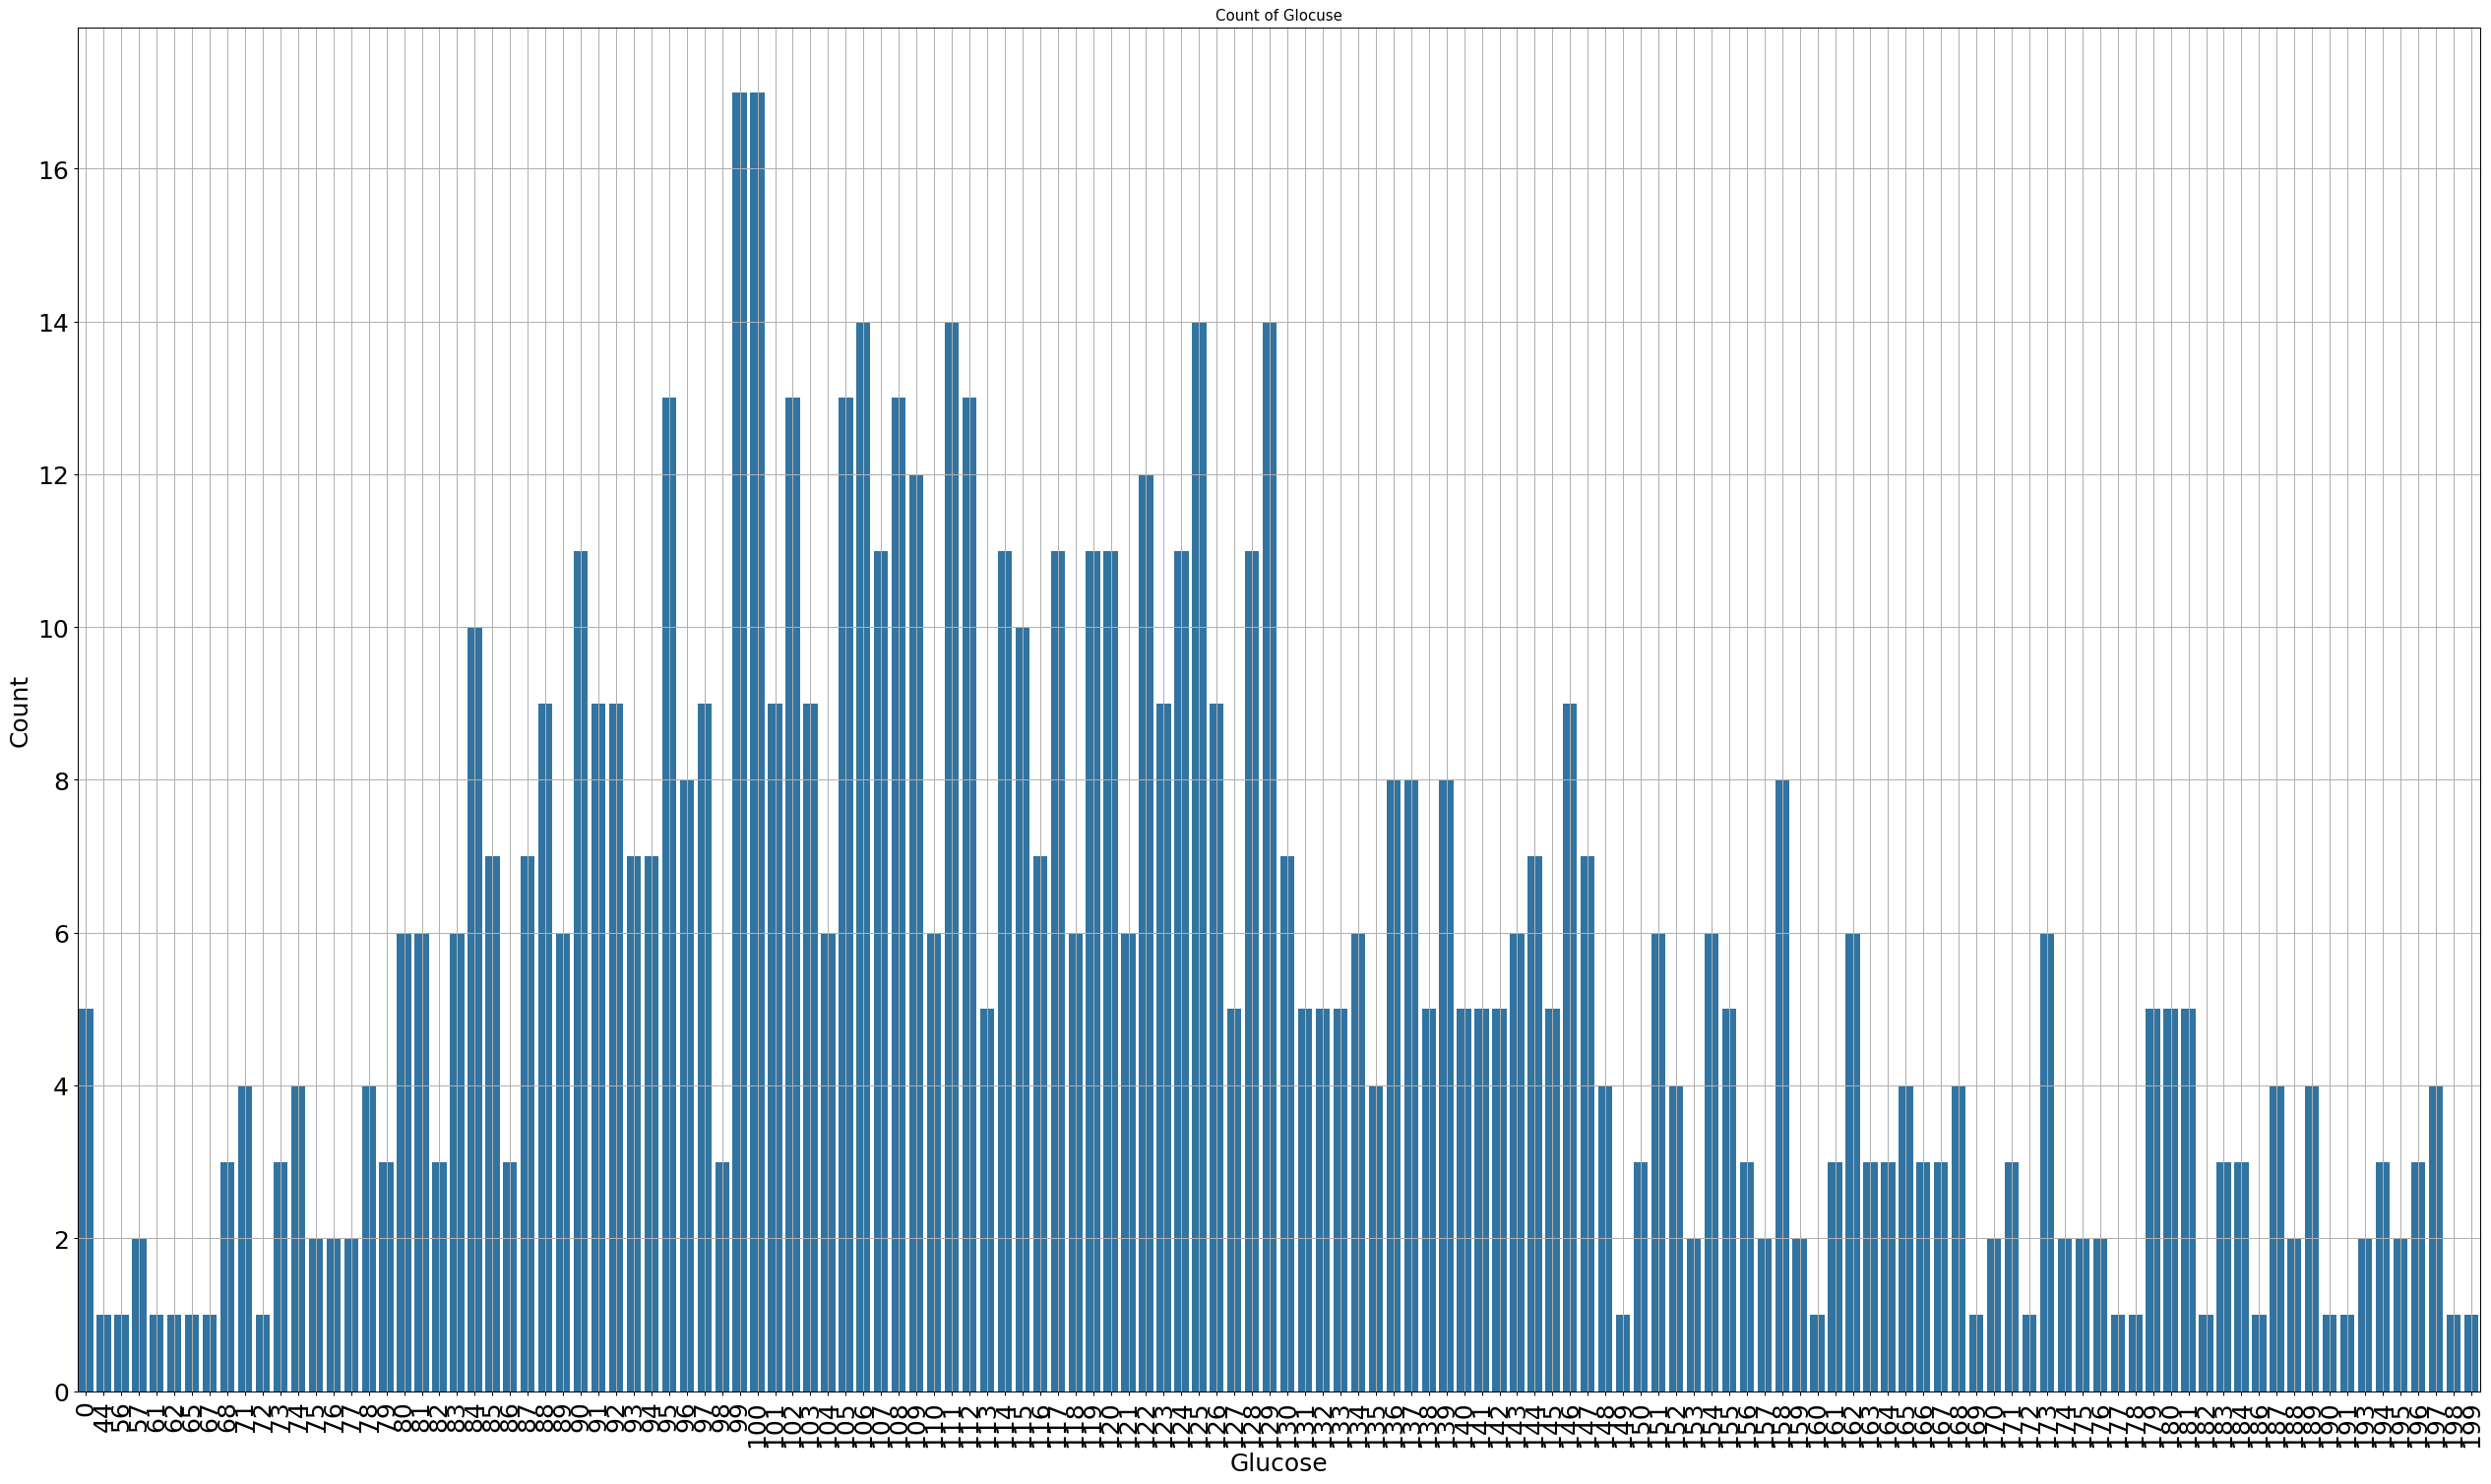

In [13]:
plt.figure(figsize=(35,20),dpi=90)
ax=sns.countplot(x="Glucose",data=Df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Glucose",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of Glocuse")
plt.grid()

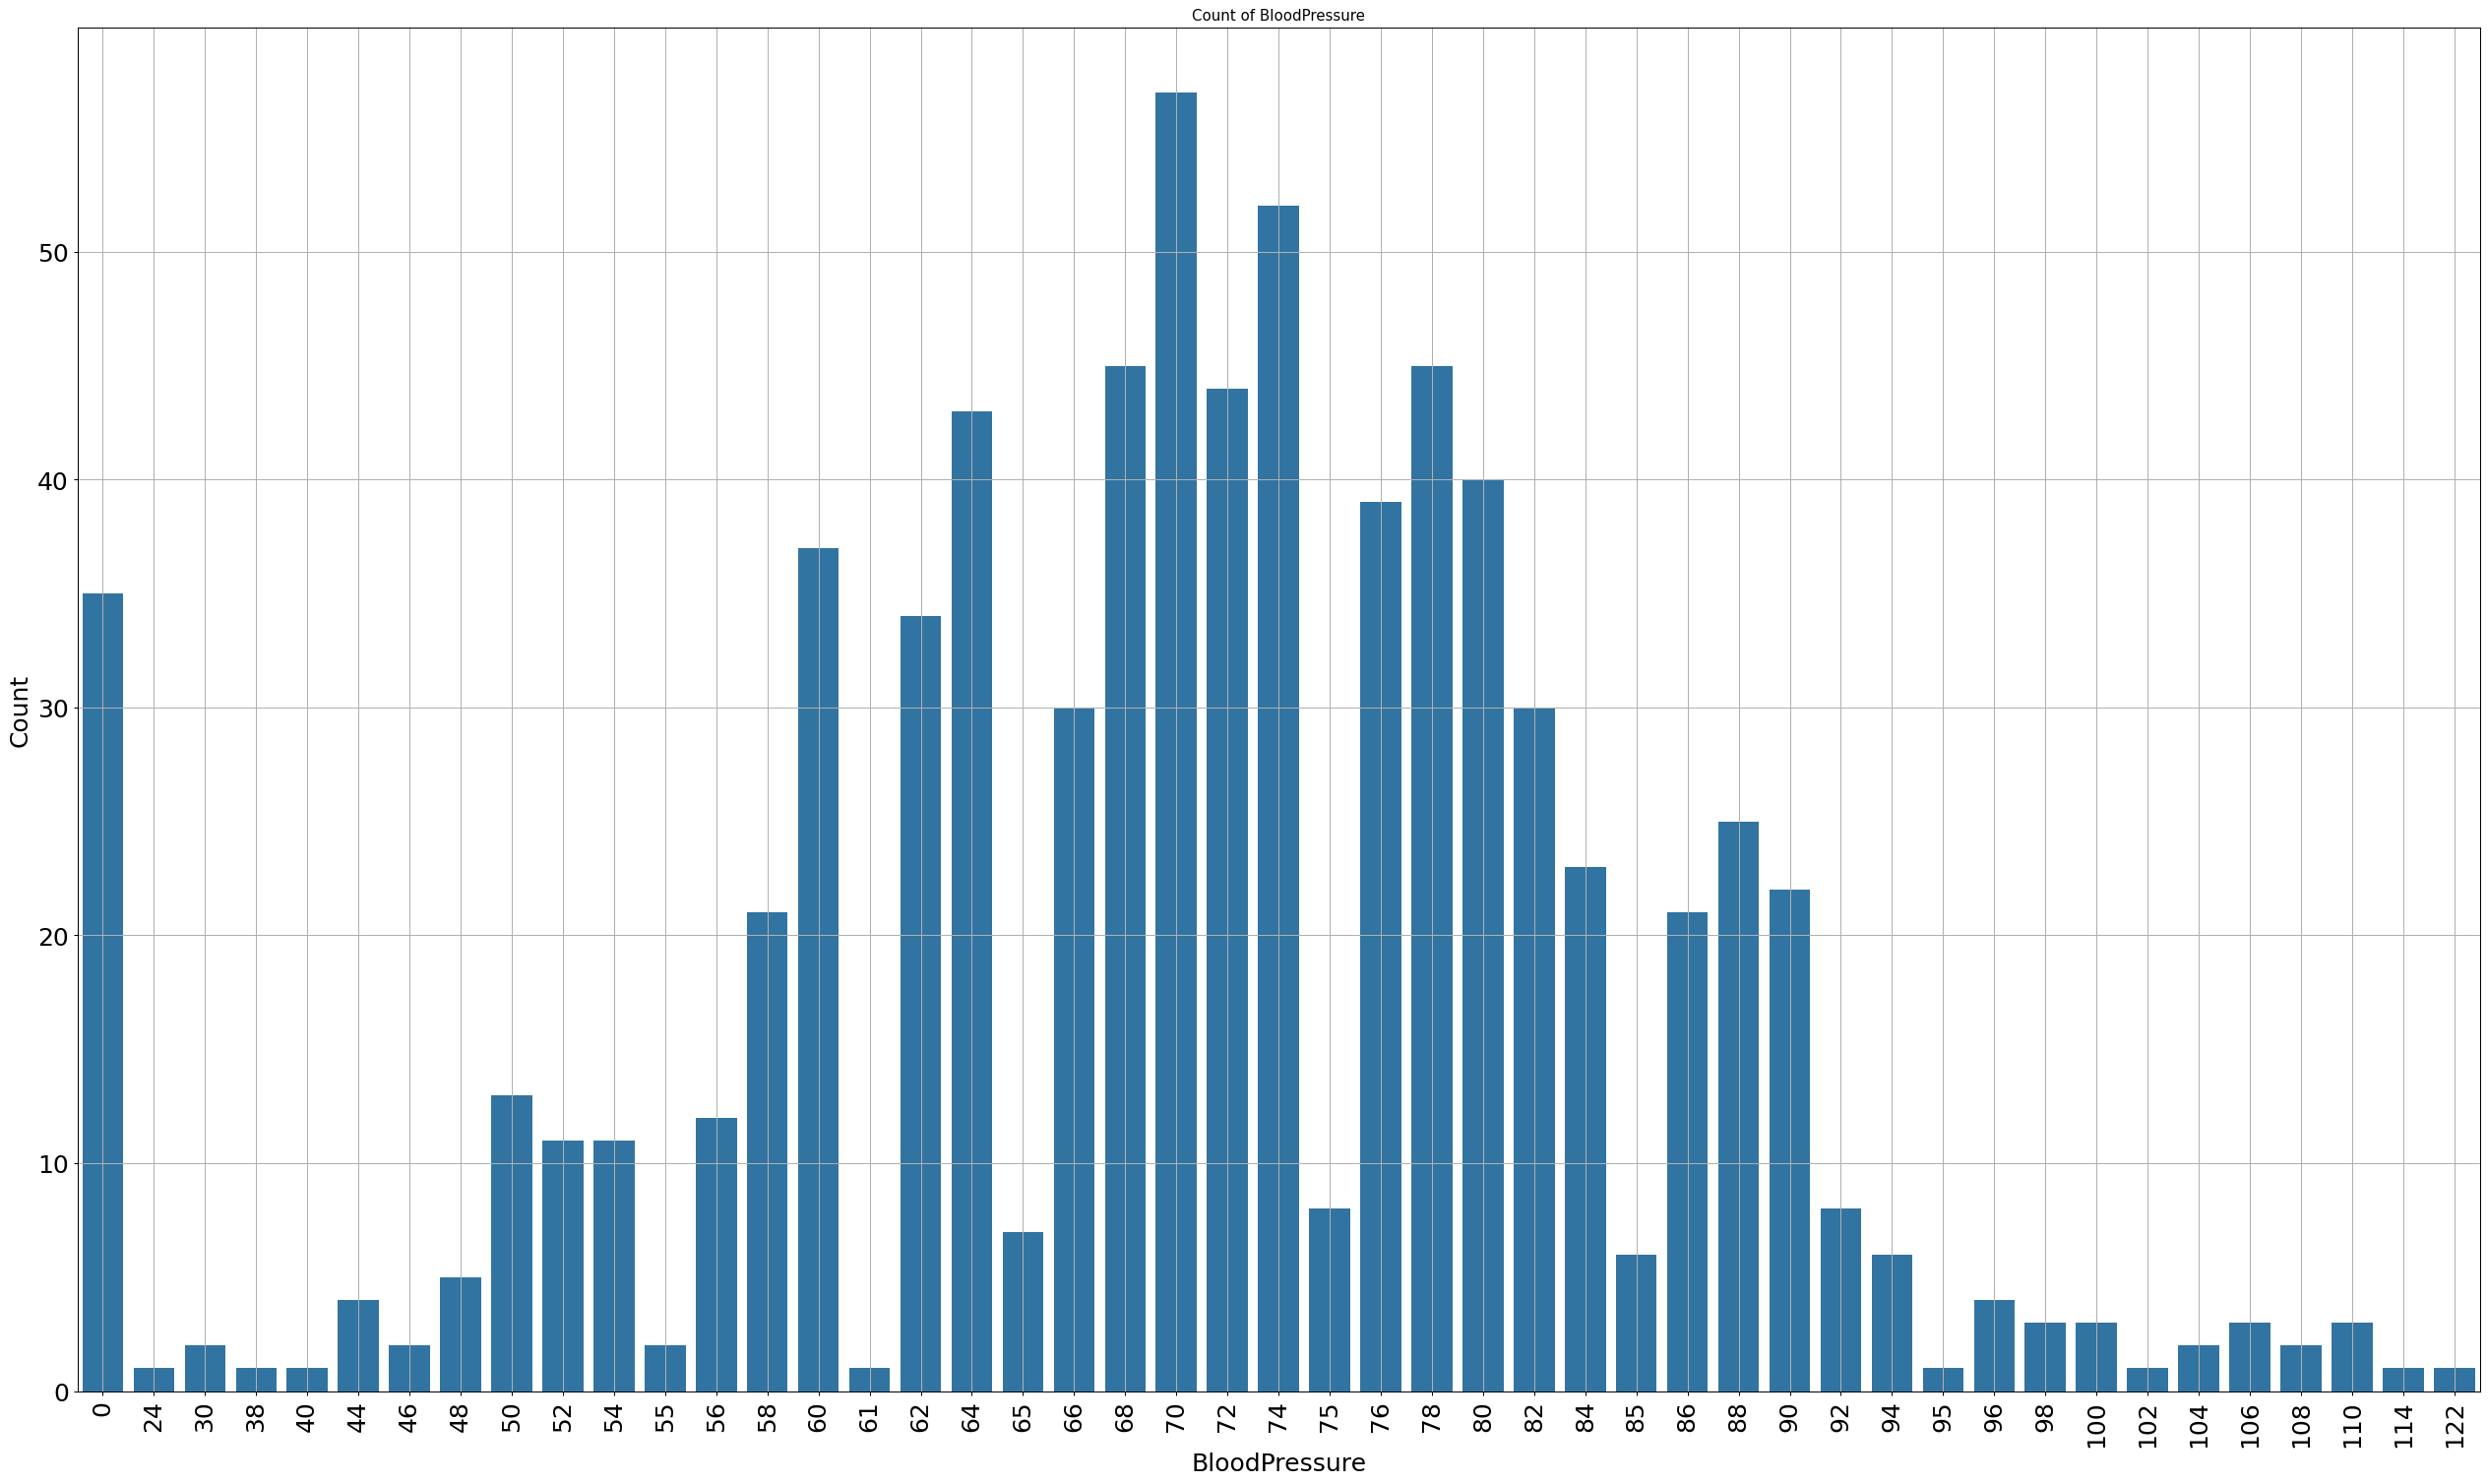

In [15]:
plt.figure(figsize=(35,20),dpi=90)
ax=sns.countplot(x="BloodPressure",data=Df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("BloodPressure",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of BloodPressure")
plt.grid()

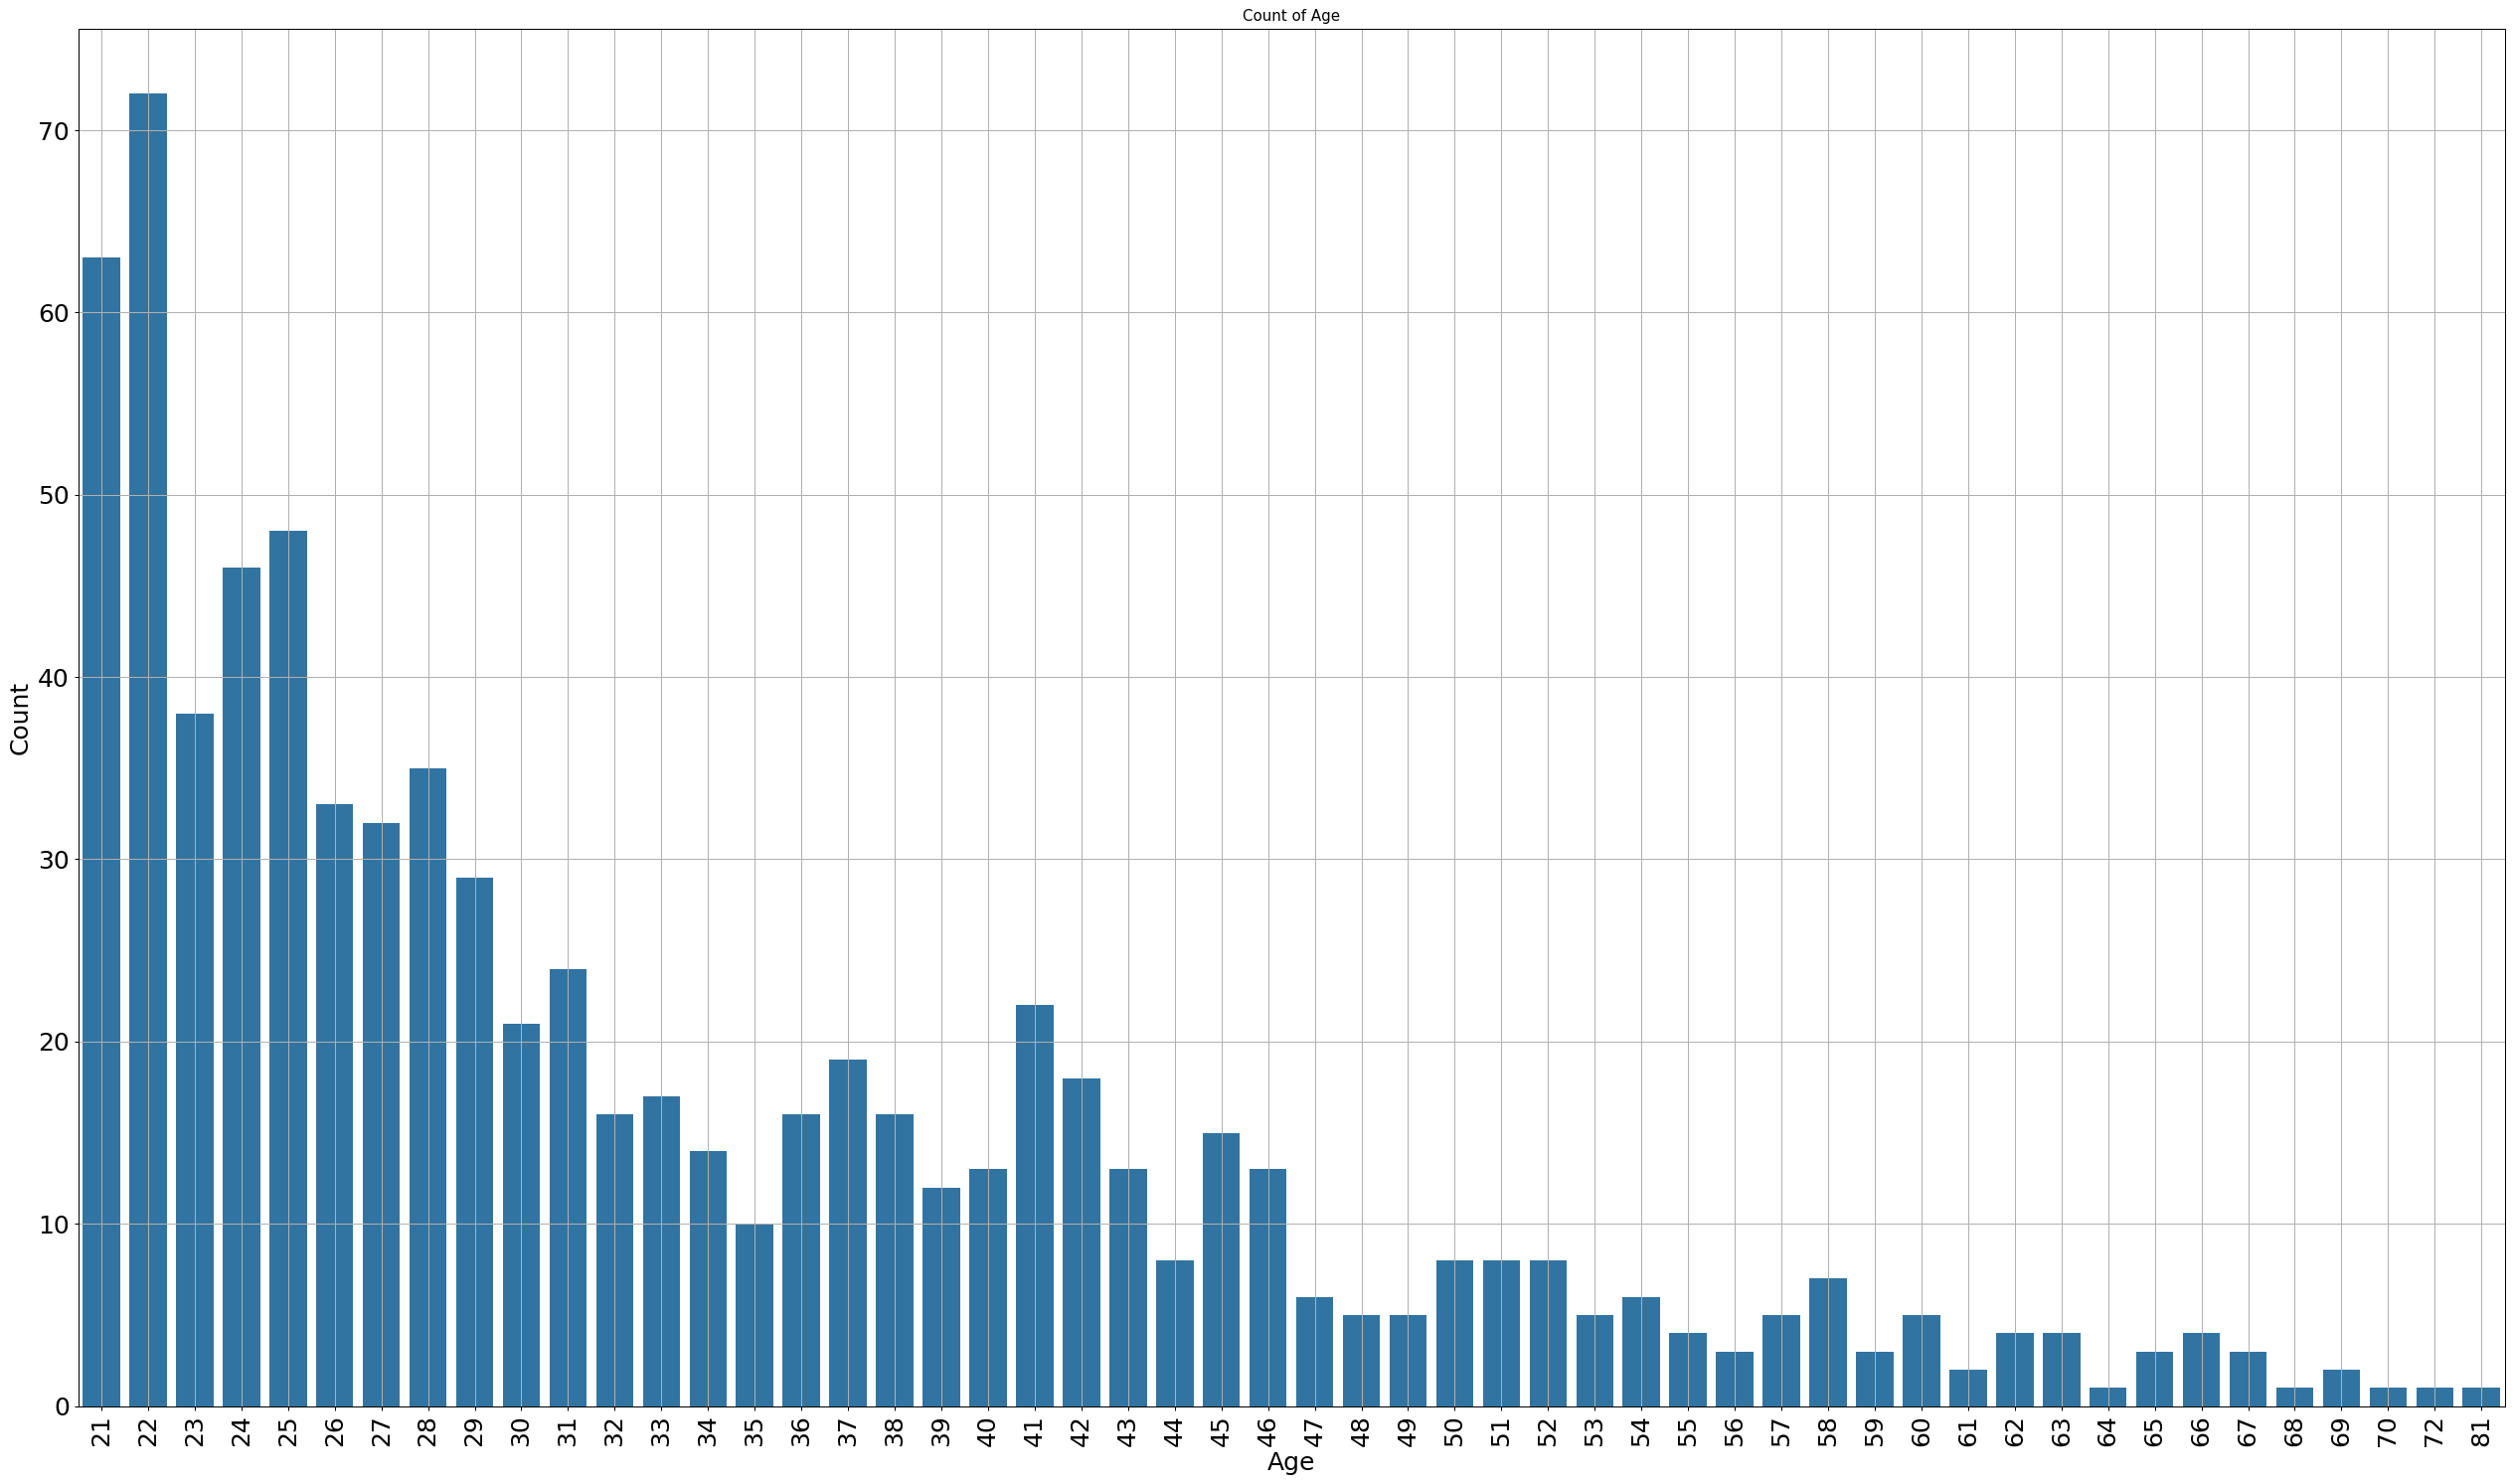

In [17]:
plt.figure(figsize=(35,20),dpi=90)
ax=sns.countplot(x="Age",data=Df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of Age")
plt.grid()

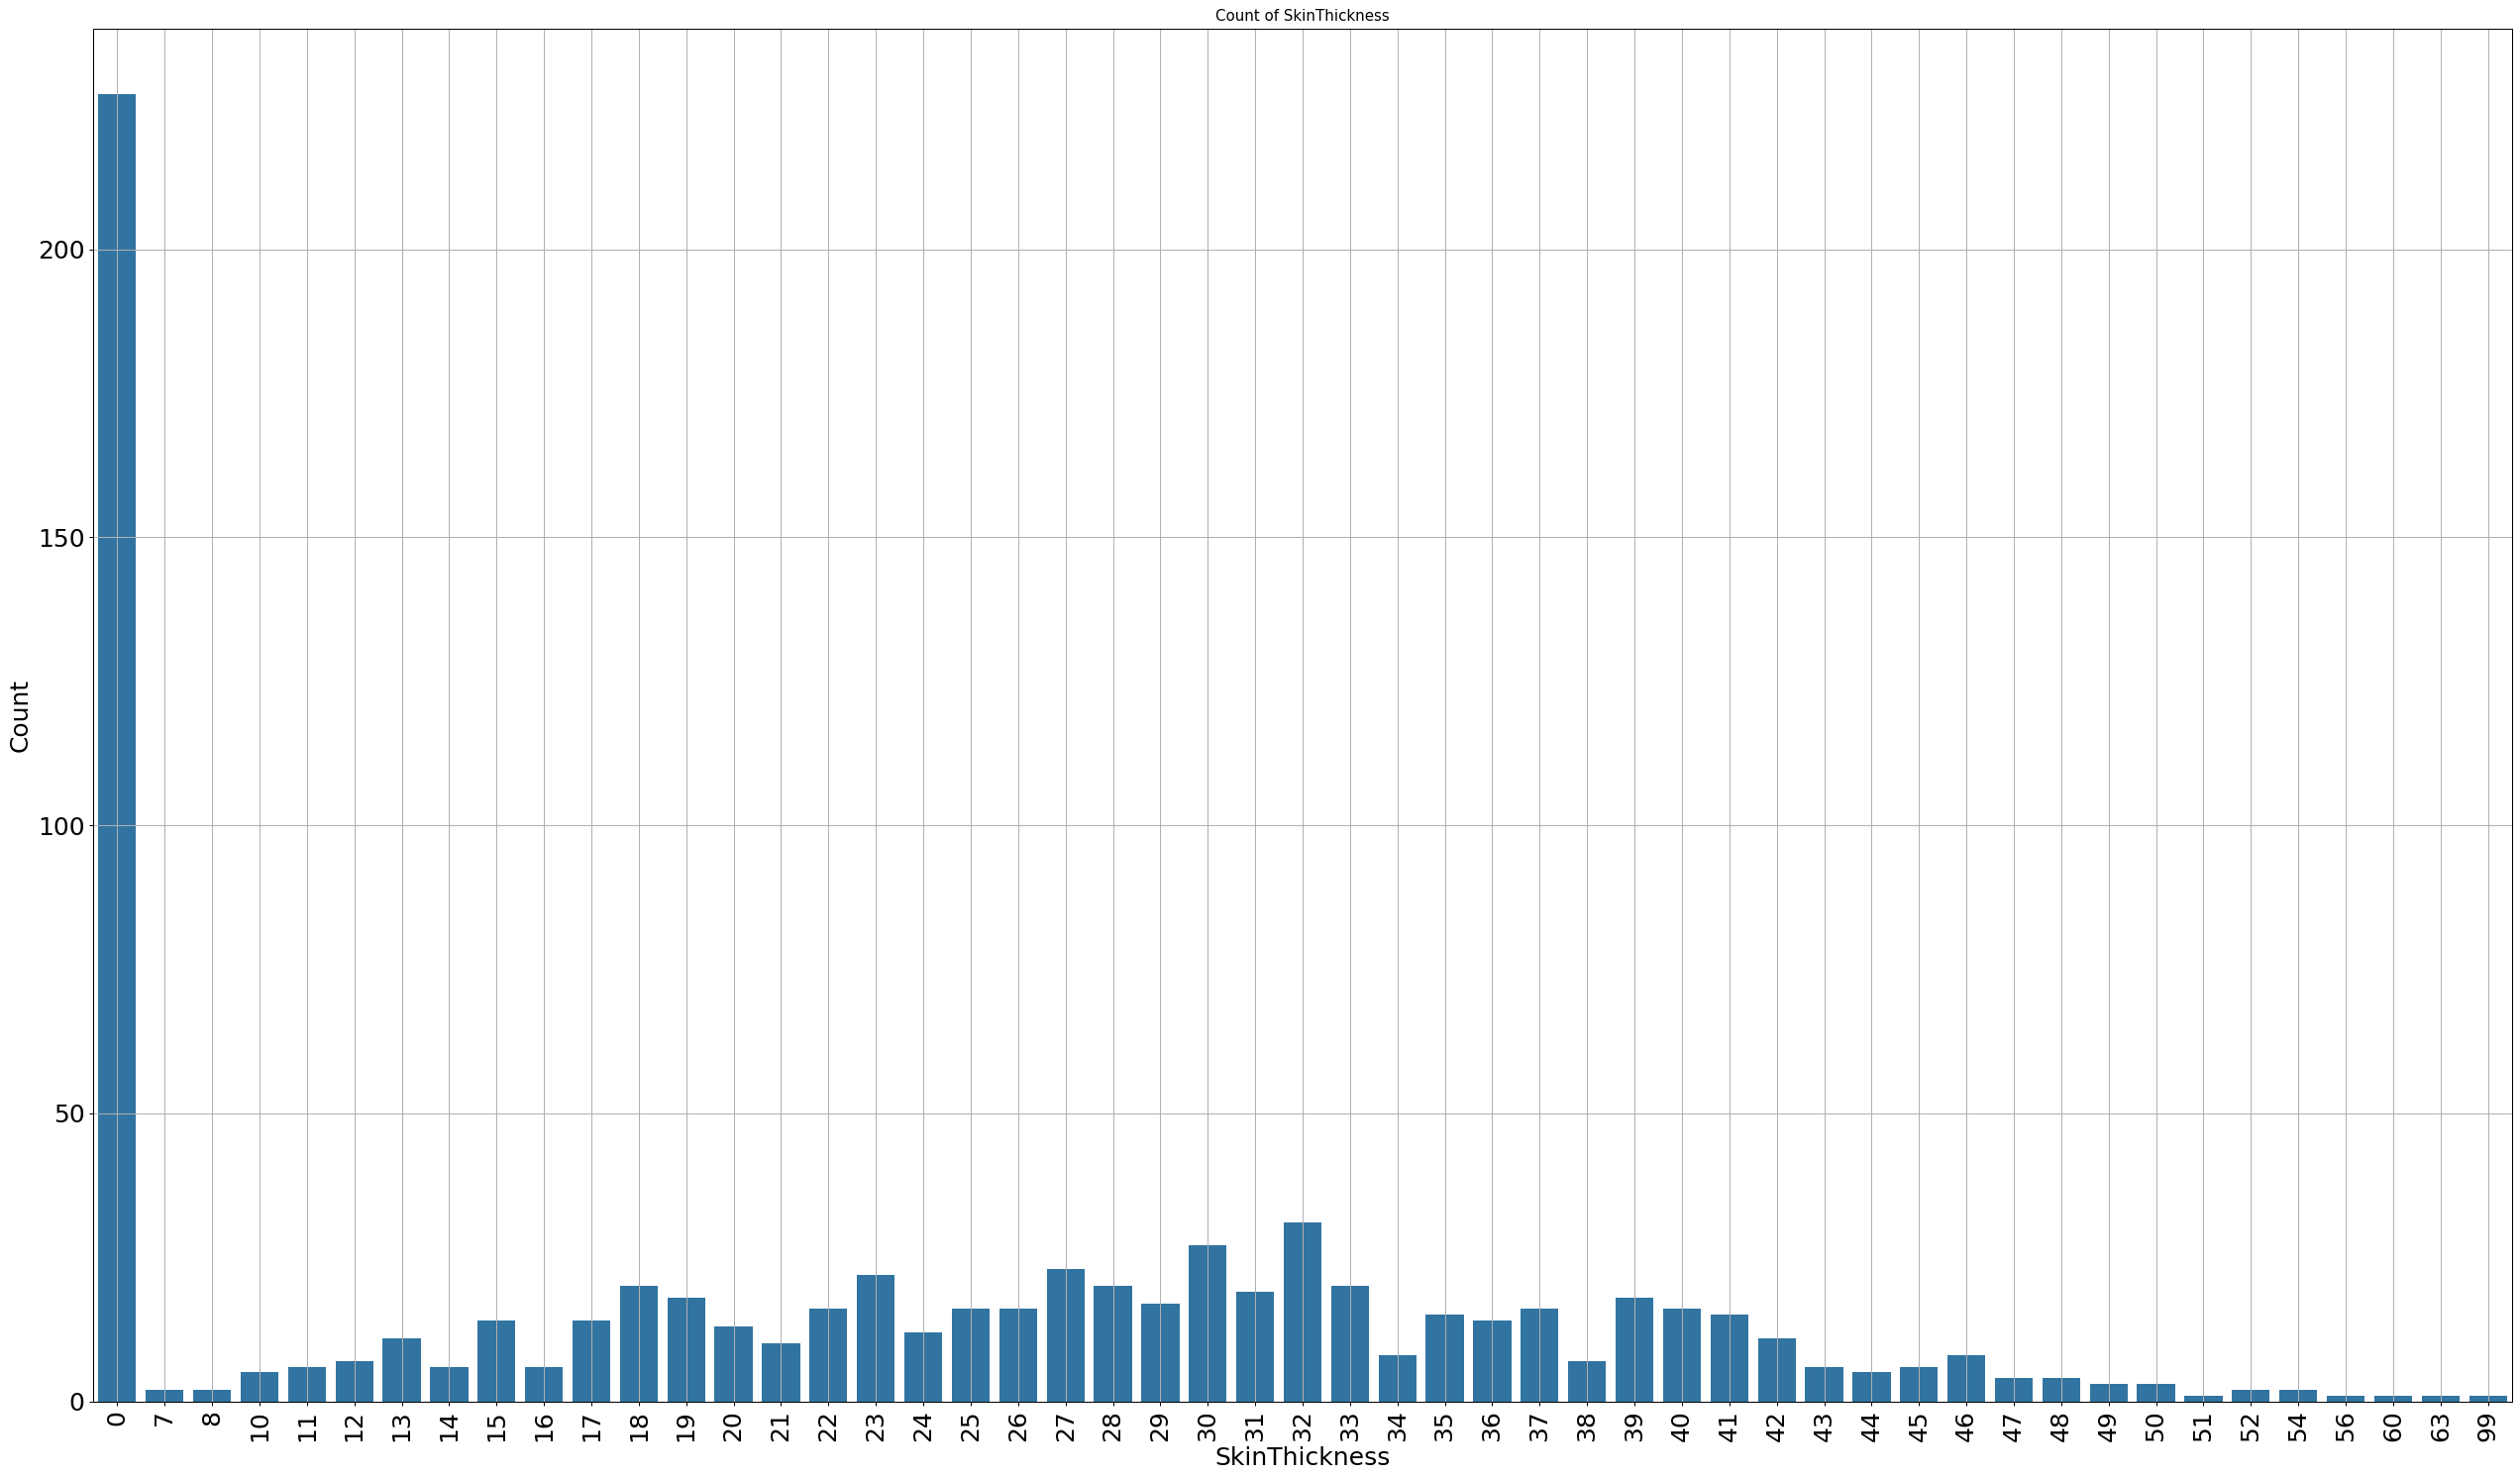

In [19]:
plt.figure(figsize=(35,20),dpi=90)
ax=sns.countplot(x="SkinThickness",data=Df)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("SkinThickness",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.title("Count of SkinThickness")
plt.grid()

In [25]:
df = Df[Df['SkinThickness']>0]
df = df[df['SkinThickness']<90]
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0


In [27]:
df2 = df.dropna(how='any')
df2.reset_index(drop=True , inplace=True)
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,89,66,23,94,28.1,0.167,21,0
3,137,40,35,168,43.1,2.288,33,1
4,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
535,170,74,31,0,44.0,0.403,43,1
536,101,76,48,180,32.9,0.171,63,0
537,122,70,27,0,36.8,0.340,27,0
538,121,72,23,112,26.2,0.245,30,0


In [31]:
x = pd.DataFrame(df2 , columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = df2.Outcome.values.reshape(-1,1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,89,66,23,94,28.1,0.167,21
3,137,40,35,168,43.1,2.288,33
4,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...
535,170,74,31,0,44.0,0.403,43
536,101,76,48,180,32.9,0.171,63
537,122,70,27,0,36.8,0.340,27
538,121,72,23,112,26.2,0.245,30


In [33]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.35 , random_state=0)

In [35]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test )

In [37]:
print("Accuracy:",metrics.accuracy_score( y_test ,y_pred ))

Accuracy: 0.7671957671957672


In [43]:
from sklearn.metrics import classification_report , confusion_matrix
clf.classes_

array([0, 1], dtype=int64)

In [48]:
confusion_matrix(y , clf.predict(x))

array([[301,  60],
       [ 65, 114]], dtype=int64)

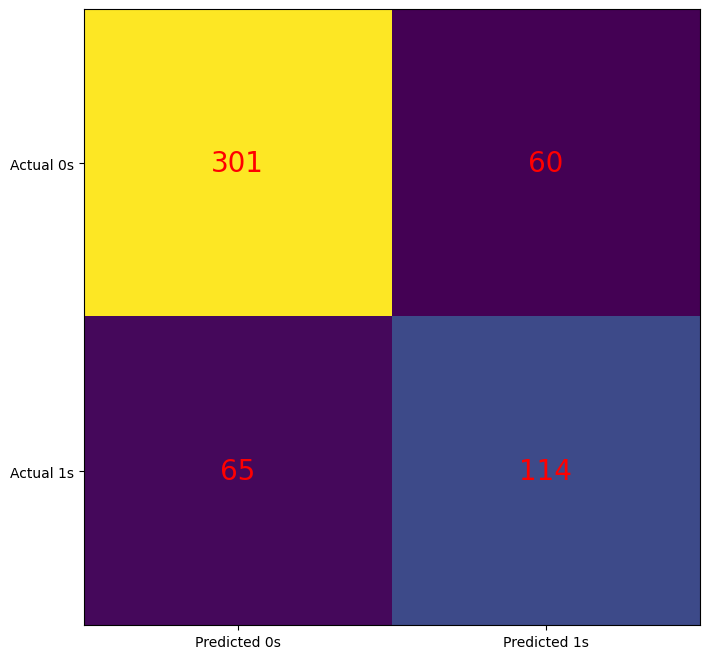

In [50]:
cm = confusion_matrix(y , clf.predict(x))

fig , ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1) , ticklabels=('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1) , ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i ,cm[i,j] , ha='center' , va='center' , color ='red',fontsize=20)
plt.show()

In [52]:
print(classification_report(y , clf.predict(x)))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       361
           1       0.66      0.64      0.65       179

    accuracy                           0.77       540
   macro avg       0.74      0.74      0.74       540
weighted avg       0.77      0.77      0.77       540



In [54]:
p1 = clf.predict([[60,32,43,93,29.7,0.371,60]])
p1

C:\Users\Utel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [56]:
# model improv ment
from sklearn.model_selection import KFold,cross_val_score

In [66]:
k_fold = KFold(5)
print(cross_val_score(clf ,x , y.ravel() , cv=k_fold , n_jobs=1))

[0.7962963  0.66666667 0.75       0.78703704 0.77777778]


In [74]:
df3 = df2[df2.index<108]
df4 = df2[df2.index>216]
df5 =df3._append(df4)
df5.reset_index(drop=True , inplace=True)
df5

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,89,66,23,94,28.1,0.167,21,0
3,137,40,35,168,43.1,2.288,33,1
4,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
426,170,74,31,0,44.0,0.403,43,1
427,101,76,48,180,32.9,0.171,63,0
428,122,70,27,0,36.8,0.340,27,0
429,121,72,23,112,26.2,0.245,30,0


In [80]:
x = pd.DataFrame(df5 , columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = df5.Outcome.values.reshape(-1,1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,89,66,23,94,28.1,0.167,21
3,137,40,35,168,43.1,2.288,33
4,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...
426,170,74,31,0,44.0,0.403,43
427,101,76,48,180,32.9,0.171,63
428,122,70,27,0,36.8,0.340,27
429,121,72,23,112,26.2,0.245,30


In [82]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.35 , random_state=0)


In [84]:
clf = GaussianNB()
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test )

In [86]:
print("Accuracy:",metrics.accuracy_score( y_test ,y_pred ))


Accuracy: 0.8410596026490066


In [88]:
confusion_matrix(y , clf.predict(x))


array([[255,  41],
       [ 46,  89]], dtype=int64)

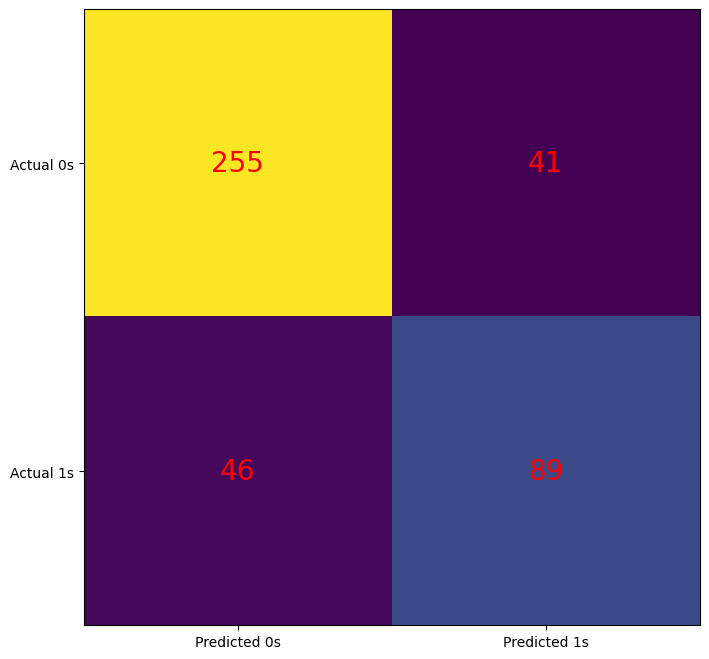

In [90]:
cm = confusion_matrix(y , clf.predict(x))

fig , ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1) , ticklabels=('Predicted 0s' , 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1) , ticklabels=('Actual 0s' , 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j , i ,cm[i,j] , ha='center' , va='center' , color ='red',fontsize=20)
plt.show()

In [92]:
print(classification_report(y , clf.predict(x)))


              precision    recall  f1-score   support

           0       0.85      0.86      0.85       296
           1       0.68      0.66      0.67       135

    accuracy                           0.80       431
   macro avg       0.77      0.76      0.76       431
weighted avg       0.80      0.80      0.80       431



In [94]:
p1 = clf.predict([[60,32,43,93,29.7,0.371,60]])
p1

C:\Users\Utel\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)